In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.options.display.max_rows = 999

In [2]:
import wrangle_superstore as w

In [3]:
df = w.wrangle_superstore()

Using cached csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1734 non-null   object        
 1   order_date    1734 non-null   datetime64[ns]
 2   ship_date     1734 non-null   datetime64[ns]
 3   ship_mode     1734 non-null   object        
 4   customer_id   1734 non-null   object        
 5   segment       1734 non-null   object        
 6   city          1734 non-null   object        
 7   state         1734 non-null   object        
 8   postal_code   1734 non-null   object        
 9   sales         1734 non-null   float64       
 10  quantity      1734 non-null   float64       
 11  discount      1734 non-null   float64       
 12  profit        1734 non-null   float64       
 13  category      1734 non-null   object        
 14  sub_category  1734 non-null   object        
 15  product_name  1734 n

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,11.78,...,0.2,4.27,Office Supplies,Labels,Avery 508,Central,4.91,1.4239,Avery,Avery_Labels
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,3.54,...,0.8,-5.49,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Central,8.85,-2.7435,GBC,GBC_Binders
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,272.74,...,0.2,-64.77,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Central,113.64,-21.5916,SAFCO,SAFCO_Storage
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,9.34,...,0.2,1.17,Office Supplies,Art,Newell 312,Central,5.84,0.5840,Newell,Newell_Art


In [6]:
df.region_name.value_counts()

East       556
West       541
Central    389
South      248
Name: region_name, dtype: int64

In [7]:
df_table = df[df.sub_category == 'Tables']

In [8]:
y = df.profit[df.sub_category == 'Accessories'].resample('2m').mean()

In [9]:
y.head()

order_date
2014-01-31    134.225000
2014-03-31    127.960000
2014-05-31     22.308000
2014-07-31     72.833333
2014-09-30     17.081429
Freq: 2M, Name: profit, dtype: float64

In [10]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
order_date,,,,
2014-01-31,134.225000,NaN,66.668918,NaN
2014-03-31,127.960000,NaN,-50.037108,NaN
2014-05-31,22.308000,NaN,-32.016135,NaN
2014-07-31,72.833333,NaN,-61.805260,NaN
2014-09-30,17.081429,NaN,51.370462,NaN


<AxesSubplot:xlabel='order_date'>

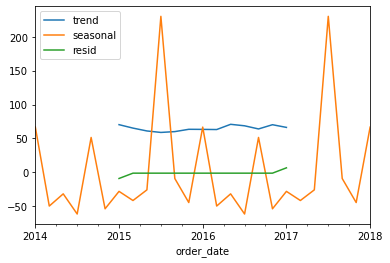

In [11]:
decomposition.iloc[:, 1:].plot()

In [12]:
y = df.profit[df.product_line == 'Xerox_Paper'].resample('3m').mean()

In [13]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
order_date,,,,
2014-03-31,47.820000,NaN,5.442926,NaN
2014-06-30,48.130000,NaN,-0.253948,NaN
2014-09-30,32.494167,32.525792,-1.339854,1.308229
2014-12-31,16.774000,26.736417,-3.849125,-6.113291
2015-03-31,17.590000,24.864930,5.442926,-12.717856


<AxesSubplot:xlabel='order_date'>

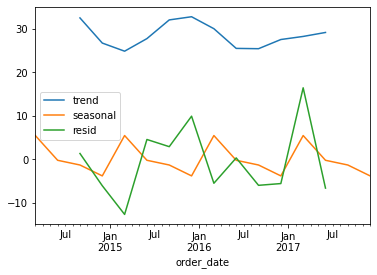

In [14]:
decomposition.iloc[:, 1:].plot()

In [15]:
df.brand.nunique()

360

In [16]:
df.groupby('sub_category').profit.sum().sort_values(ascending=False).head(25)

sub_category
Accessories    7786.37
Phones         6547.30
Copiers        5598.39
Paper          5464.41
Chairs         4306.38
Binders        4062.58
Appliances     2776.50
Storage        2771.72
Furnishings    2124.42
Labels         1544.50
Envelopes      1394.52
Art            1336.42
Fasteners       215.62
Supplies       -253.98
Machines       -680.68
Bookcases     -2267.77
Tables        -4786.18
Name: profit, dtype: float64

In [17]:
df.sub_category.value_counts()

Binders        263
Paper          224
Furnishings    168
Storage        162
Phones         157
Art            149
Accessories    131
Chairs          95
Appliances      71
Labels          67
Tables          62
Envelopes       48
Fasteners       43
Bookcases       35
Supplies        28
Machines        21
Copiers         10
Name: sub_category, dtype: int64

In [18]:
y = df.profit[df.sub_category == 'Phones']

Text(0.5, 1.0, 'Lag plot with lag=1')

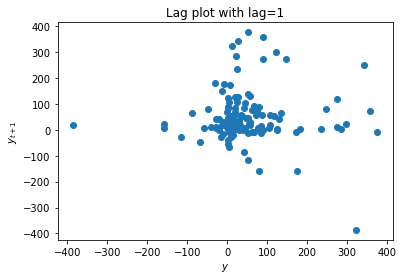

In [19]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [20]:
y = df.profit[df.sub_category == 'Phones'].resample('2m').mean()

In [21]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
order_date,,,,
2014-01-31,75.465000,NaN,-12.383054,NaN
2014-03-31,4.600000,NaN,-7.788536,NaN
2014-05-31,50.645714,NaN,24.333604,NaN
2014-07-31,93.638750,NaN,-37.737384,NaN
2014-09-30,24.298571,NaN,-56.213268,NaN


<AxesSubplot:xlabel='order_date'>

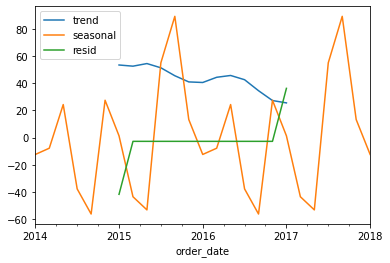

In [22]:
decomposition.iloc[:, 1:].plot()

In [23]:
# It would appear phone profits tend to rise during the last half of the year

In [24]:
df_phones = df[df.sub_category == 'Phones']

In [25]:
y = df_phones.profit

<AxesSubplot:xlabel='order_date'>

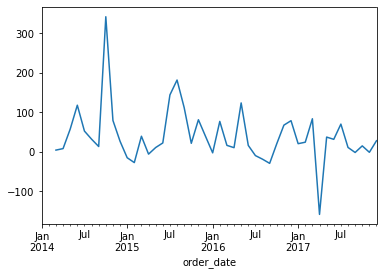

In [26]:
y.resample('m').mean().plot()

In [27]:
df_profit = df[df.profit > 0]
df_loss = df[df.profit <= 0]

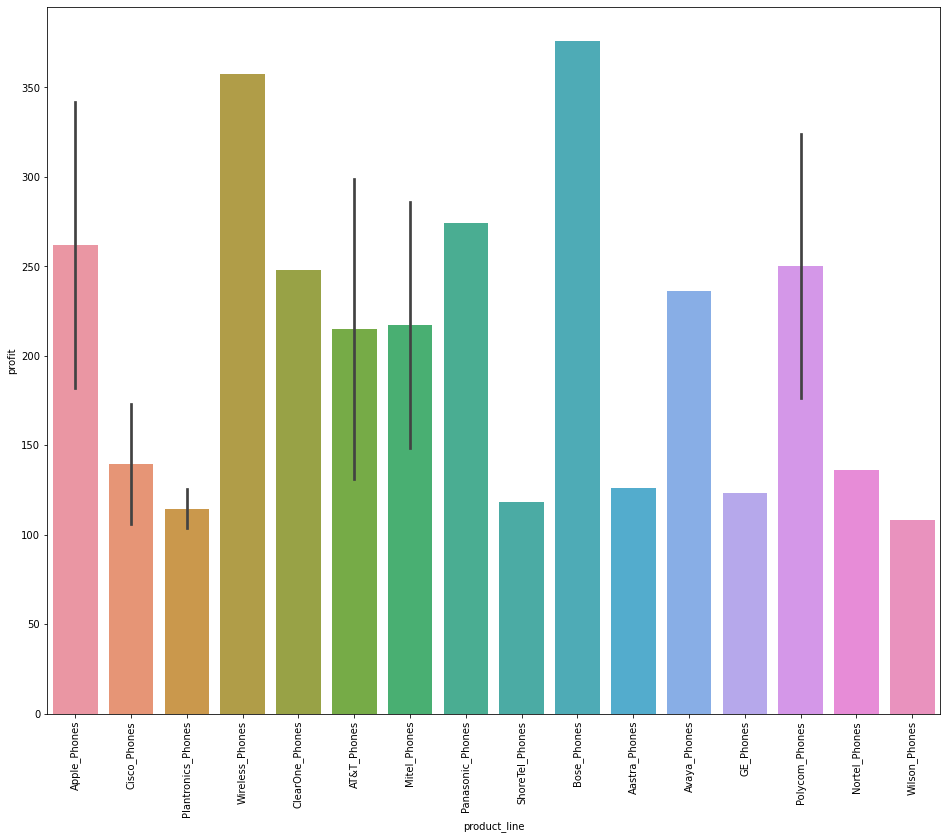

In [28]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_profit[(df_profit.sub_category == 'Phones') & (df_profit.profit > 100)])
plt.xticks(rotation=90)
plt.show()

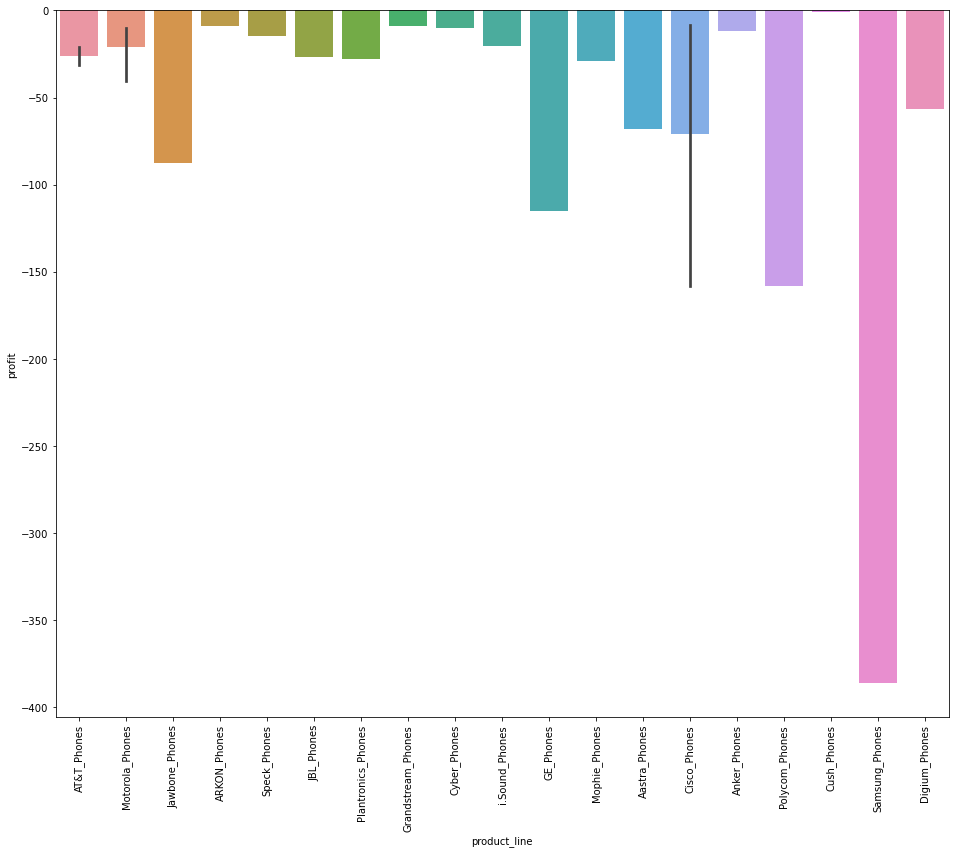

In [29]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_loss[(df_loss.sub_category == 'Phones')])
plt.xticks(rotation=90)
plt.show()

In [30]:
df_profit = df[df.profit > 0]
df_loss = df[df.profit <= 0]

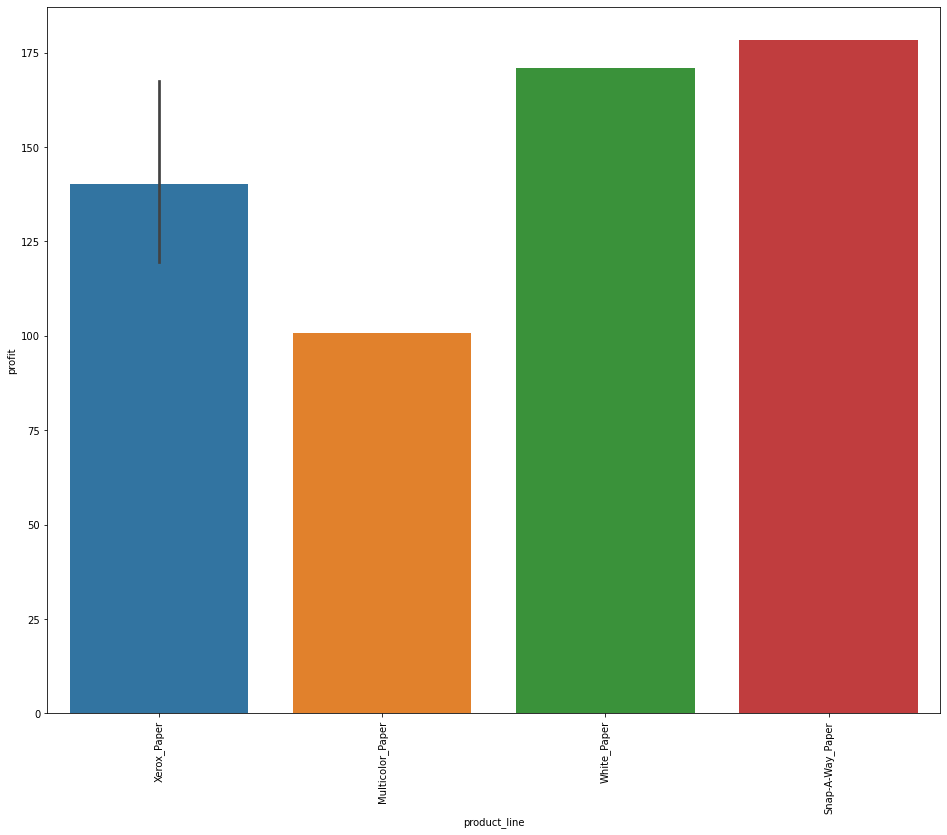

In [31]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_profit[(df_profit.sub_category == 'Paper') & (df_profit.profit > 100)])
plt.xticks(rotation=90)
plt.show()

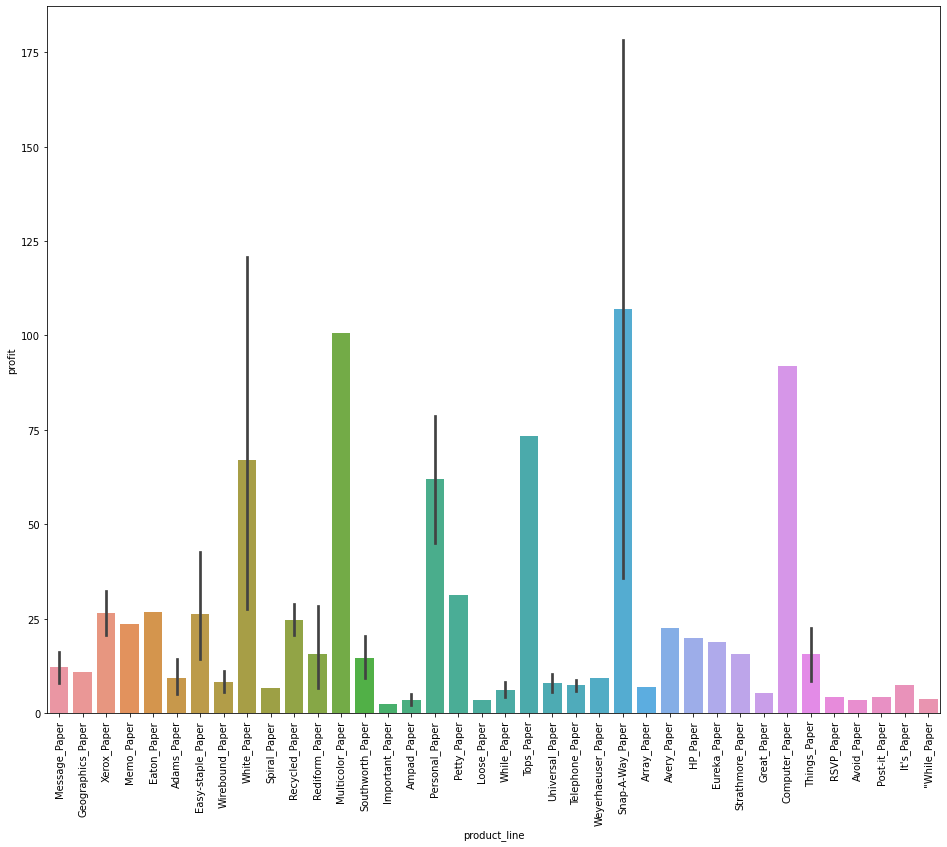

In [32]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y = 'profit', data = df[(df.sub_category == 'Paper')])
plt.xticks(rotation=90)
plt.show()

In [33]:
df[(df.sub_category == 'Paper') & (df.profit < 0)]

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,


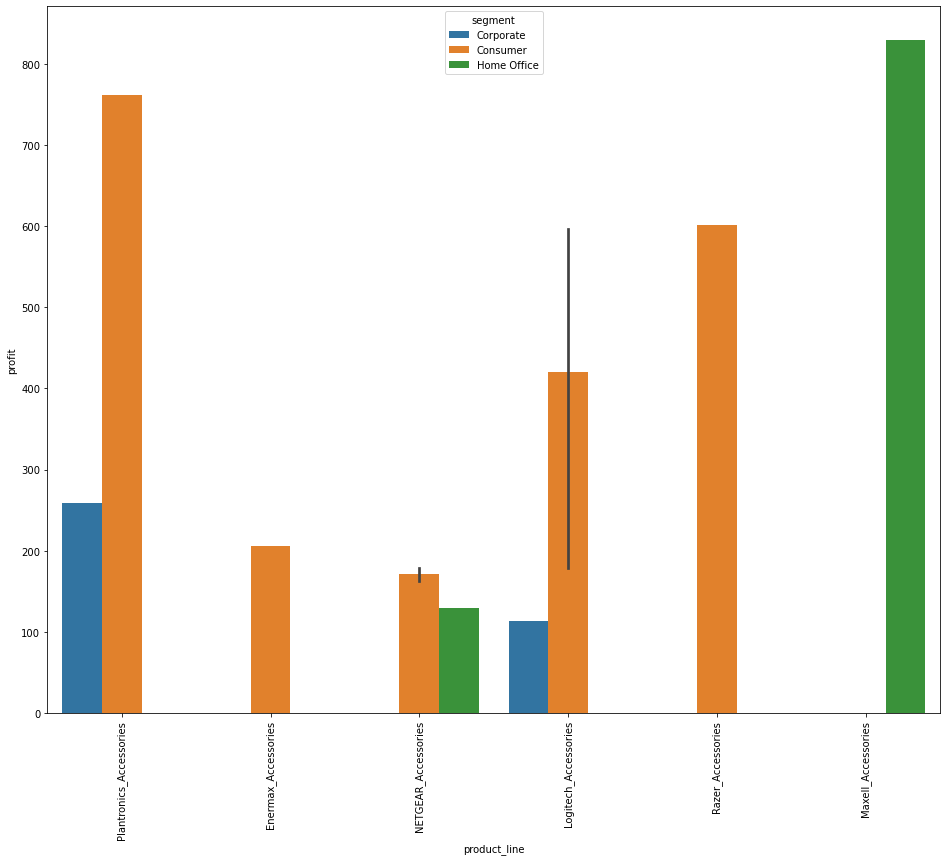

In [34]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_profit[(df_profit.sub_category == 'Accessories') & (df_profit.profit > 100)], hue='segment')
plt.xticks(rotation=90)
plt.show()

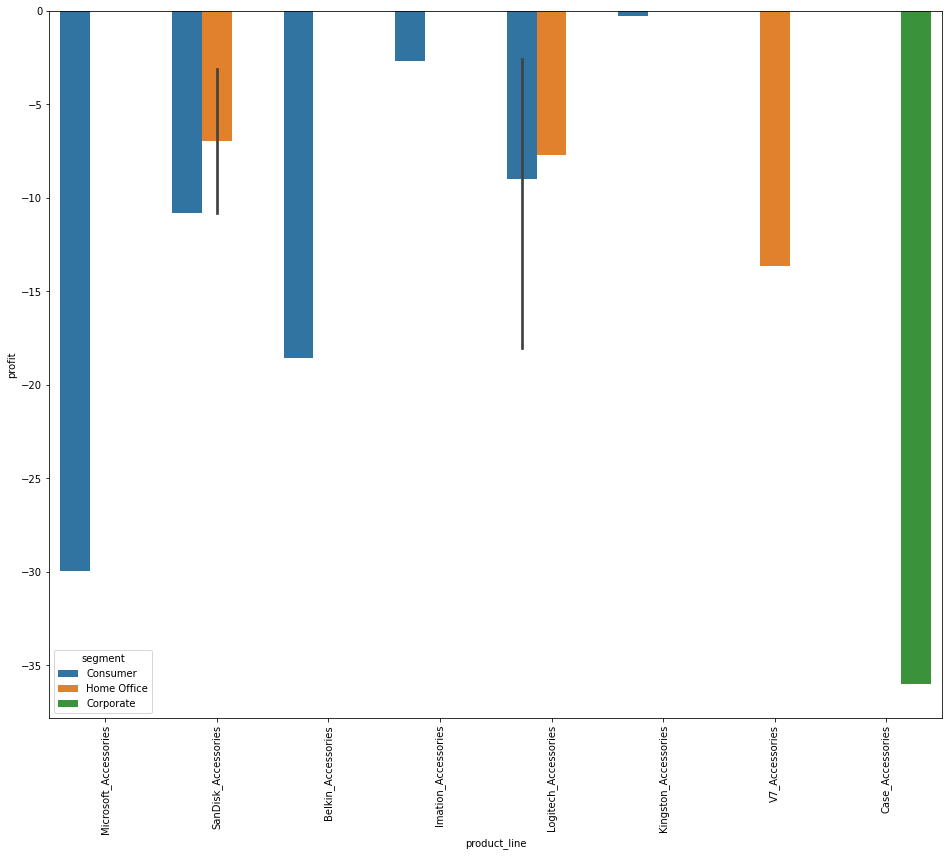

In [35]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_loss[(df_loss.sub_category == 'Accessories')], hue='segment')
plt.xticks(rotation=90)
plt.show()

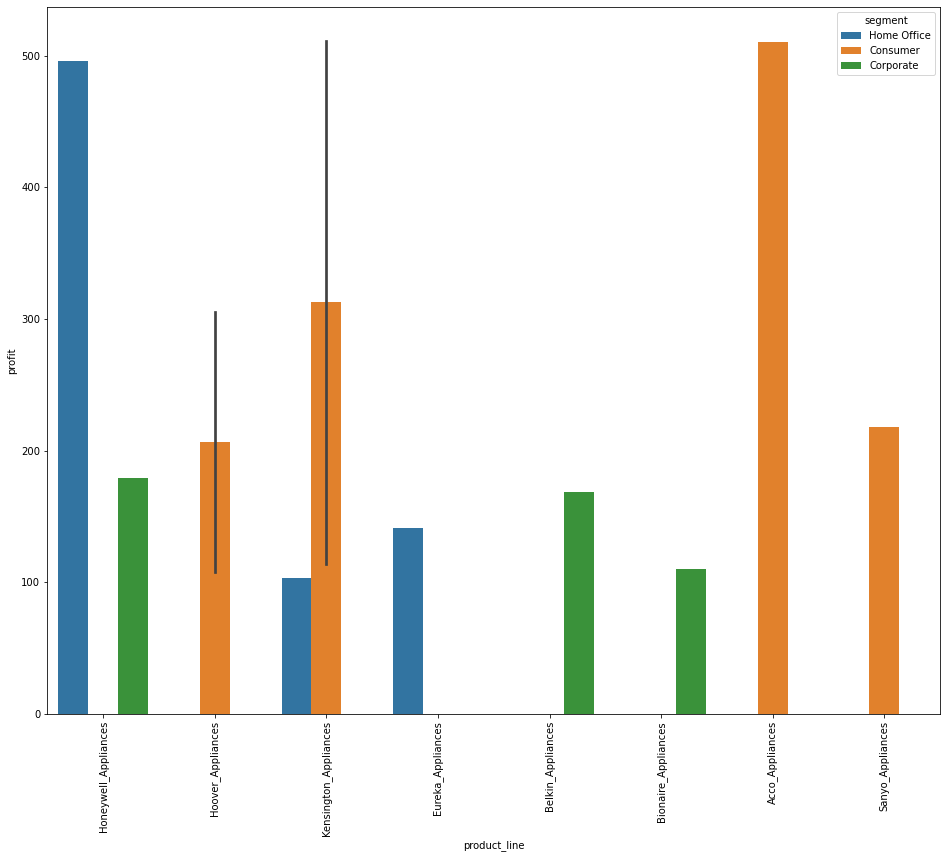

In [36]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_profit[(df_profit.sub_category == 'Appliances') & (df_profit.profit > 100)], hue='segment')
plt.xticks(rotation=90)
plt.show()

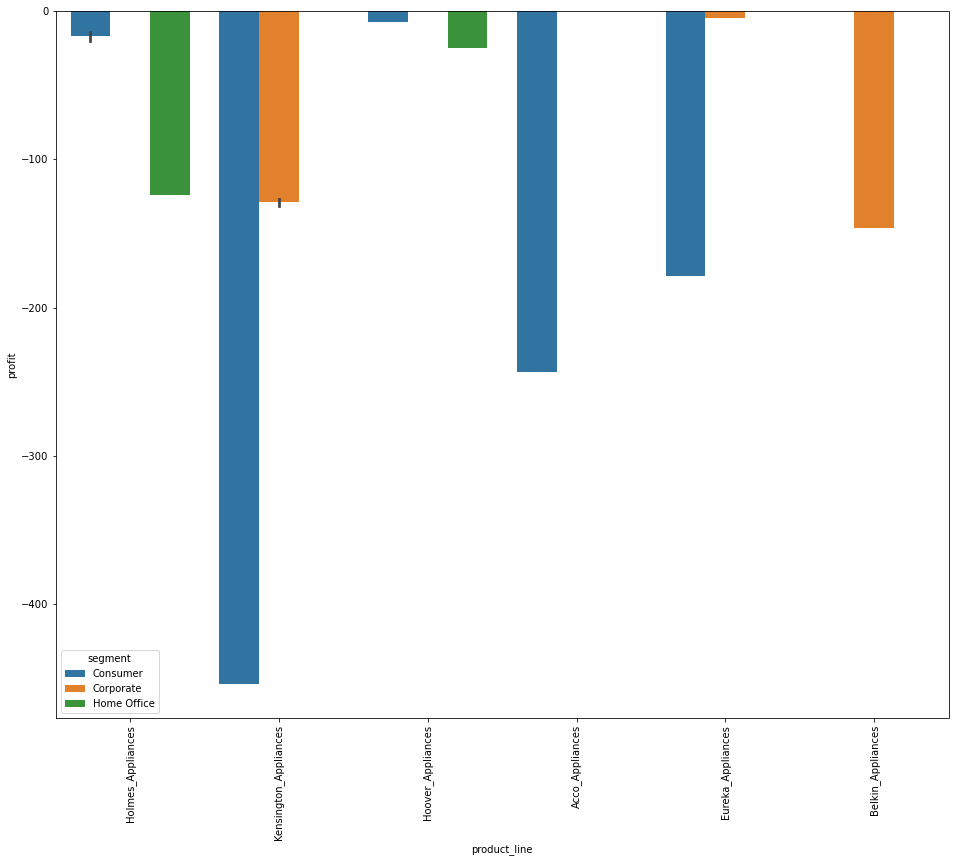

In [37]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_loss[(df_loss.sub_category == 'Appliances')], hue='segment')
plt.xticks(rotation=90)
plt.show()

In [38]:
df_app = df[df.sub_category == 'Appliances']

In [39]:
df_app.brand.value_counts()

Belkin        15
Kensington     9
Fellowes       8
Eureka         6
Acco           6
Holmes         5
Hoover         5
Tripp          2
Sanyo          2
3M             2
Bionaire       2
Honeywell      2
Avanti         1
Conquest       1
1.7            1
Sanitaire      1
Bravo          1
Commercial     1
Staple         1
Name: brand, dtype: int64

In [40]:
df_acc = df[df.sub_category == 'Accessories']

In [41]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2014-01-09 to 2017-12-18
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      131 non-null    object        
 1   order_date    131 non-null    datetime64[ns]
 2   ship_date     131 non-null    datetime64[ns]
 3   ship_mode     131 non-null    object        
 4   customer_id   131 non-null    object        
 5   segment       131 non-null    object        
 6   city          131 non-null    object        
 7   state         131 non-null    object        
 8   postal_code   131 non-null    object        
 9   sales         131 non-null    float64       
 10  quantity      131 non-null    float64       
 11  discount      131 non-null    float64       
 12  profit        131 non-null    float64       
 13  category      131 non-null    object        
 14  sub_category  131 non-null    object        
 15  product_name  131 non

In [42]:
df_acc.head(132)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2014-02-01,CA-2014-140795,2014-02-01,2014-02-03,First Class,BD-11500,Consumer,Green Bay,Wisconsin,54302,468.90,...,0.0,206.32,Technology,Accessories,Enermax Aurora Lite Keyboard,Central,78.15,34.3860,Enermax,Enermax_Accessories
2014-02-07,CA-2014-107755,2014-02-07,2014-02-12,Standard Class,CK-12760,Corporate,Linden,New Jersey,7036,115.36,...,0.0,49.60,Technology,Accessories,Maxell DVD-RAM Discs,East,16.48,7.0864,Maxell,Maxell_Accessories
2014-04-06,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Home Office,Philadelphia,Pennsylvania,19143,116.78,...,0.2,21.90,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,East,72.99,10.9485,Imation,Imation_Accessories
2014-05-09,US-2014-102071,2014-05-09,2014-05-15,Standard Class,PG-18820,Consumer,San Francisco,California,94110,67.80,...,0.0,4.07,Technology,Accessories,Kingston Digital DataTraveler 32GB USB 2.0,West,16.95,1.0170,Kingston,Kingston_Accessories
2014-05-09,US-2014-102071,2014-05-09,2014-05-15,Standard Class,PG-18820,Consumer,San Francisco,California,94110,167.97,...,0.0,40.31,Technology,Accessories,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,West,55.99,13.4376,Sony,Sony_Accessories
2014-05-11,CA-2014-103849,2014-05-11,2014-05-16,Standard Class,PG-18895,Consumer,Fort Worth,Texas,76106,58.11,...,0.2,7.26,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,Central,36.32,3.6320,SanDisk,SanDisk_Accessories
2014-05-27,CA-2014-139192,2014-05-27,2014-06-01,Second Class,LC-16885,Consumer,San Francisco,California,94109,99.99,...,0.0,38.00,Technology,Accessories,Logitech Wireless Performance Mouse MX for PC ...,West,99.99,37.9962,Logitech,Logitech_Accessories


In [43]:
df_acc.product_name.nunique()

84

In [44]:
acc_profit = df_acc[df_acc.profit > 0]

In [45]:
acc_loss = df_acc[df_acc.profit <= 0]

In [46]:
acc_profit = acc_profit.sort_values(by='profit', ascending=False)

In [47]:
acc_profit.head(20)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2017-09-02,CA-2017-137596,2017-09-02,2017-09-07,Standard Class,BE-11335,Home Office,Jackson,Michigan,49201,1928.78,...,0.0,829.38,Technology,Accessories,Maxell iVDR EX 500GB Cartridge,Central,275.54,118.4822,Maxell,Maxell_Accessories
2015-07-31,CA-2015-124891,2015-07-31,2015-07-31,Same Day,RH-19495,Consumer,New York City,New York,10024,2309.65,...,0.0,762.18,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,East,329.95,108.8835,Plantronics,Plantronics_Accessories
2016-09-11,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Consumer,San Diego,California,92037,3347.37,...,0.0,636.00,Technology,Accessories,Logitech P710e Mobile Speakerphone,West,257.49,48.9231,Logitech,Logitech_Accessories
2017-05-14,CA-2017-143686,2017-05-14,2017-05-14,Same Day,PJ-19015,Consumer,Santa Ana,California,92704,1399.93,...,0.0,601.97,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,West,199.99,85.9957,Razer,Razer_Accessories
2015-12-19,CA-2015-157084,2015-12-19,2015-12-24,Standard Class,JG-15160,Consumer,Los Angeles,California,90049,1265.85,...,0.0,556.97,Technology,Accessories,Logitech G19 Programmable Gaming Keyboard,West,421.95,185.6580,Logitech,Logitech_Accessories
2015-12-15,CA-2015-109638,2015-12-15,2015-12-22,Standard Class,JH-15985,Consumer,Seattle,Washington,98115,899.91,...,0.0,377.96,Technology,Accessories,Logitech G700s Rechargeable Gaming Mouse,West,99.99,41.9958,Logitech,Logitech_Accessories
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2014-02-01,CA-2014-140795,2014-02-01,2014-02-03,First Class,BD-11500,Consumer,Green Bay,Wisconsin,54302,468.90,...,0.0,206.32,Technology,Accessories,Enermax Aurora Lite Keyboard,Central,78.15,34.3860,Enermax,Enermax_Accessories
2014-07-23,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,1023.94,...,0.2,179.19,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,West,159.99,22.3986,NETGEAR,NETGEAR_Accessories


<AxesSubplot:xlabel='order_date'>

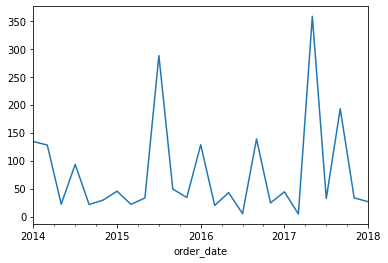

In [48]:
acc_profit.profit.resample('2M').mean().plot()

In [49]:
acc_loss.head(16)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-07-23,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,479.04,...,0.2,-29.94,Technology,Accessories,Microsoft Natural Keyboard Elite,West,59.88,-2.9940,Microsoft,Microsoft_Accessories
2014-08-08,CA-2014-151708,2014-08-08,2014-08-14,Standard Class,MB-17305,Consumer,Glendale,Arizona,85301,95.98,...,0.2,-10.80,Technology,Accessories,SanDisk Ultra 64 GB MicroSDHC Class 10 Memory ...,West,39.99,-3.5991,SanDisk,SanDisk_Accessories
2014-12-19,US-2014-150574,2014-12-19,2014-12-25,Standard Class,MK-18160,Consumer,Jacksonville,Florida,32216,247.80,...,0.2,-18.58,Technology,Accessories,Belkin QODE FastFit Bluetooth Keyboard,South,61.95,-3.7170,Belkin,Belkin_Accessories
2015-10-03,US-2015-157014,2015-10-03,2015-10-06,Second Class,BM-11785,Consumer,Columbus,Ohio,43229,24.00,...,0.2,-2.70,Technology,Accessories,Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive,East,15.00,-1.3500,Imation,Imation_Accessories
2015-11-01,CA-2015-105221,2015-11-01,2015-11-03,First Class,VM-21685,Home Office,Philadelphia,Pennsylvania,19140,35.36,...,0.2,-3.09,Technology,Accessories,SanDisk Ultra 32 GB MicroSDHC Class 10 Memory ...,East,22.10,-1.5470,SanDisk,SanDisk_Accessories
2015-11-13,US-2015-156867,2015-11-13,2015-11-17,Standard Class,LC-16870,Consumer,Aurora,Colorado,80013,238.90,...,0.2,-26.88,Technology,Accessories,Logitech K350 2.4Ghz Wireless Keyboard,West,49.77,-4.4793,Logitech,Logitech_Accessories
2015-11-27,US-2015-168935,2015-11-27,2015-12-02,Standard Class,DO-13435,Consumer,Pembroke Pines,Florida,33024,83.98,...,0.2,-1.05,Technology,Accessories,Logitech Media Keyboard K200,South,34.99,-0.3499,Logitech,Logitech_Accessories
2015-11-29,CA-2015-129112,2015-11-29,2015-11-30,First Class,AW-10840,Consumer,Allen,Texas,75002,21.48,...,0.2,-0.27,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,Central,8.95,-0.0895,Kingston,Kingston_Accessories
2016-03-15,US-2016-113509,2016-03-15,2016-03-19,Standard Class,PL-18925,Home Office,Philadelphia,Pennsylvania,19143,83.98,...,0.2,-13.65,Technology,Accessories,V7 USB Numeric Keypad,East,34.99,-4.5487,V7,V7_Accessories


In [50]:
df_acc.product_name.str.split()

order_date
2014-01-09               [Memorex, Micro, Travel, Drive, 8, GB]
2014-01-13    [Plantronics, S12, Corded, Telephone, Headset,...
2014-02-01                    [Enermax, Aurora, Lite, Keyboard]
2014-02-07                             [Maxell, DVD-RAM, Discs]
2014-04-06    [Imation, Secure+, Hardware, Encrypted, USB, 2...
2014-05-09    [Kingston, Digital, DataTraveler, 32GB, USB, 2.0]
2014-05-09    [Sony, Micro, Vault, Click, 16, GB, USB, 2.0, ...
2014-05-11         [SanDisk, Cruzer, 64, GB, USB, Flash, Drive]
2014-05-27    [Logitech, Wireless, Performance, Mouse, MX, f...
2014-06-09                    [Logitech, M510, Wireless, Mouse]
2014-06-22     [KeyTronic, 6101, Series, -, Keyboard, -, Black]
2014-07-05    [NETGEAR, AC1750, Dual, Band, Gigabit, Smart, ...
2014-07-22            [Logitech, G602, Wireless, Gaming, Mouse]
2014-07-23                [Microsoft, Natural, Keyboard, Elite]
2014-07-23    [NETGEAR, AC1750, Dual, Band, Gigabit, Smart, ...
2014-08-08    [SanDisk, Ultra

In [51]:
df_acc_key = df_acc[(df_acc.product_name.str.contains('Keyboard')) | (df_acc.product_name.str.contains('keyboard'))]

In [52]:
df_acc_key = df_acc.sort_values(by='profit', ascending=False)

In [53]:
df_acc.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2014-02-01,CA-2014-140795,2014-02-01,2014-02-03,First Class,BD-11500,Consumer,Green Bay,Wisconsin,54302,468.90,...,0.0,206.32,Technology,Accessories,Enermax Aurora Lite Keyboard,Central,78.15,34.3860,Enermax,Enermax_Accessories
2014-02-07,CA-2014-107755,2014-02-07,2014-02-12,Standard Class,CK-12760,Corporate,Linden,New Jersey,7036,115.36,...,0.0,49.60,Technology,Accessories,Maxell DVD-RAM Discs,East,16.48,7.0864,Maxell,Maxell_Accessories
2014-04-06,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Home Office,Philadelphia,Pennsylvania,19143,116.78,...,0.2,21.90,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,East,72.99,10.9485,Imation,Imation_Accessories


<AxesSubplot:xlabel='region_name', ylabel='quantity'>

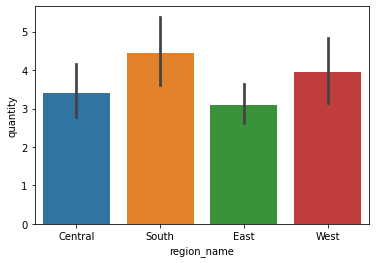

In [54]:
sns.barplot(x='region_name', y='quantity', data=df_acc)

<AxesSubplot:xlabel='region_name', ylabel='profit'>

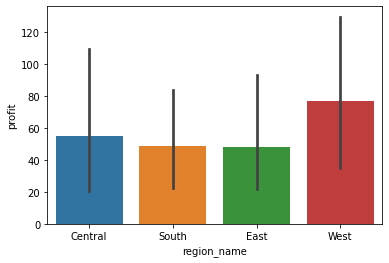

In [55]:
sns.barplot(x='region_name', y='profit', data=df_acc)

<AxesSubplot:xlabel='ship_mode', ylabel='profit'>

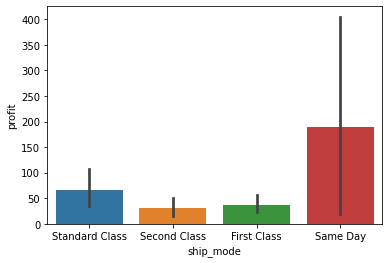

In [56]:
sns.barplot(x='ship_mode', y='profit', data=df_acc)

In [57]:
df_acc.brand.value_counts()

Logitech       39
Imation        12
Memorex         9
SanDisk         9
Sony            8
Verbatim        6
Microsoft       6
Maxell          5
Plantronics     5
NETGEAR         4
Belkin          3
Enermax         3
Razer           3
Kingston        2
Hypercom        2
Kensington      2
Micro           2
Sabrent         2
Anker           1
WD              1
First           1
Micropad        1
HP              1
V7              1
Lenovo          1
KeyTronic       1
Case            1
Name: brand, dtype: int64

In [58]:
df_acc.product_name.value_counts()

Logitech P710e Mobile Speakerphone                                        6
Imation Secure+ Hardware Encrypted USB 2.0 Flash Drive; 16GB              4
Logitech G19 Programmable Gaming Keyboard                                 4
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling                 3
Plantronics S12 Corded Telephone Headset System                           3
Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 25/Pack           3
SanDisk Ultra 32 GB MicroSDHC Class 10 Memory Card                        3
Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive                         3
NETGEAR AC1750 Dual Band Gigabit Smart WiFi Router                        3
Microsoft Sculpt Comfort Mouse                                            3
Logitech K350 2.4Ghz Wireless Keyboard                                    2
Sony 16GB Class 10 Micro SDHC R40 Memory Card                             2
Logitech G13 Programmable Gameboard with LCD Display                      2
Sabrent 4-Po

<AxesSubplot:xlabel='order_date'>

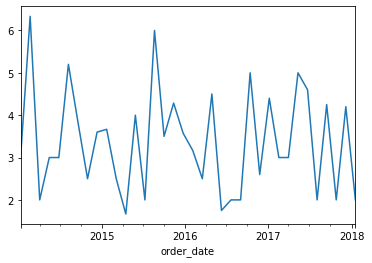

In [59]:
df_acc.quantity.resample('6w').mean().plot()

In [60]:
def heatmap(df):
    '''
    This function takes in our dataframe and creates a correlation from it. This correlation is then mapped as a heatmap.
    '''
    # Creation and mapping of the correlation
    corr = df.corr()
    # Separating the top half of the heatmap to laster mask
    matrix = np.triu(corr)
    plt.figure(figsize=(16,9))
    ax = sns.heatmap(corr, cmap='coolwarm', mask=matrix)
    ax.set(title='Heatmap')

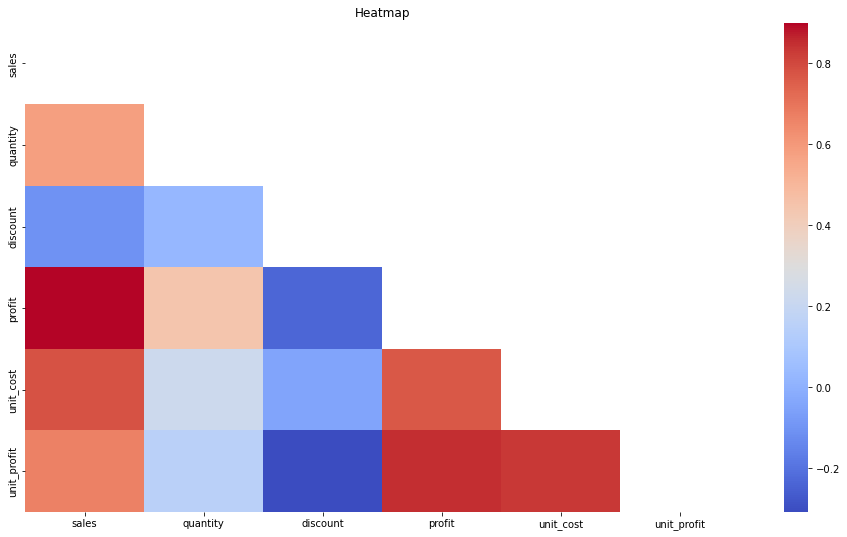

In [61]:
heatmap(df_acc)

In [62]:
_list = ['Plantronics', 'Maxell', 'Razer', 'Case', 'V7', 'NETGEAR']

In [63]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,11.78,...,0.2,4.27,Office Supplies,Labels,Avery 508,Central,4.91,1.4239,Avery,Avery_Labels
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,3.54,...,0.8,-5.49,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Central,8.85,-2.7435,GBC,GBC_Binders
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,272.74,...,0.2,-64.77,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Central,113.64,-21.5916,SAFCO,SAFCO_Storage
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,9.34,...,0.2,1.17,Office Supplies,Art,Newell 312,Central,5.84,0.5840,Newell,Newell_Art


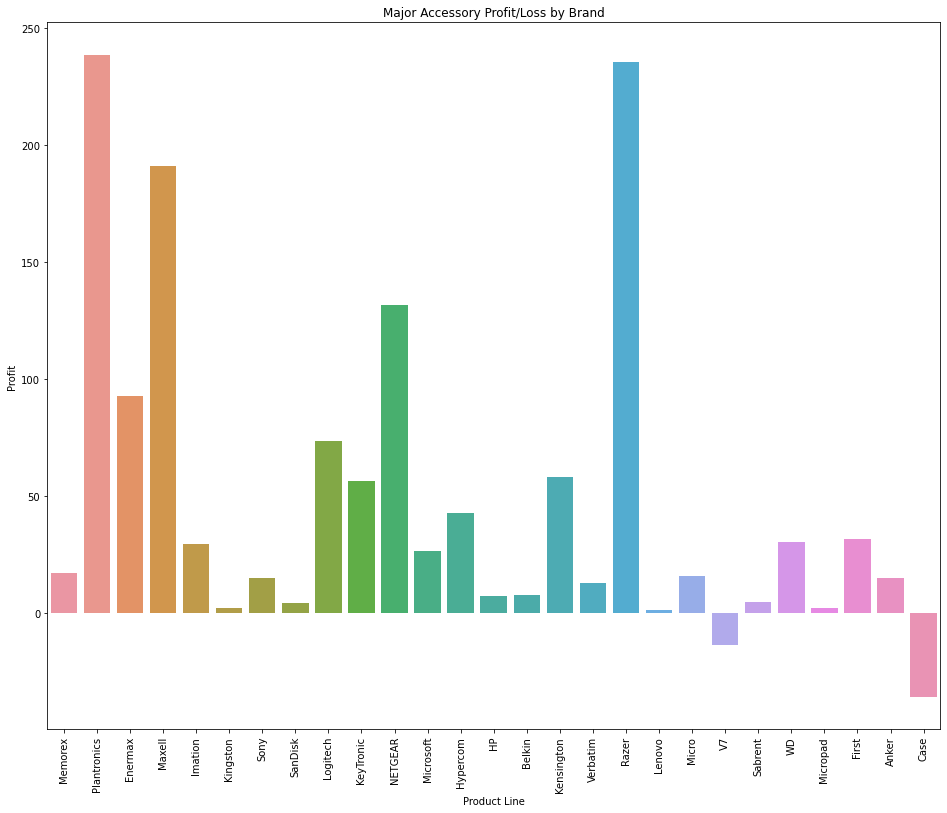

In [64]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'brand', y = 'profit', data = df[(df.sub_category == 'Accessories')]  , ci=None)
plt.xlabel('Product Line')
plt.ylabel('Profit')
plt.title('Major Accessory Profit/Loss by Brand')
plt.xticks(rotation=90)
plt.show()

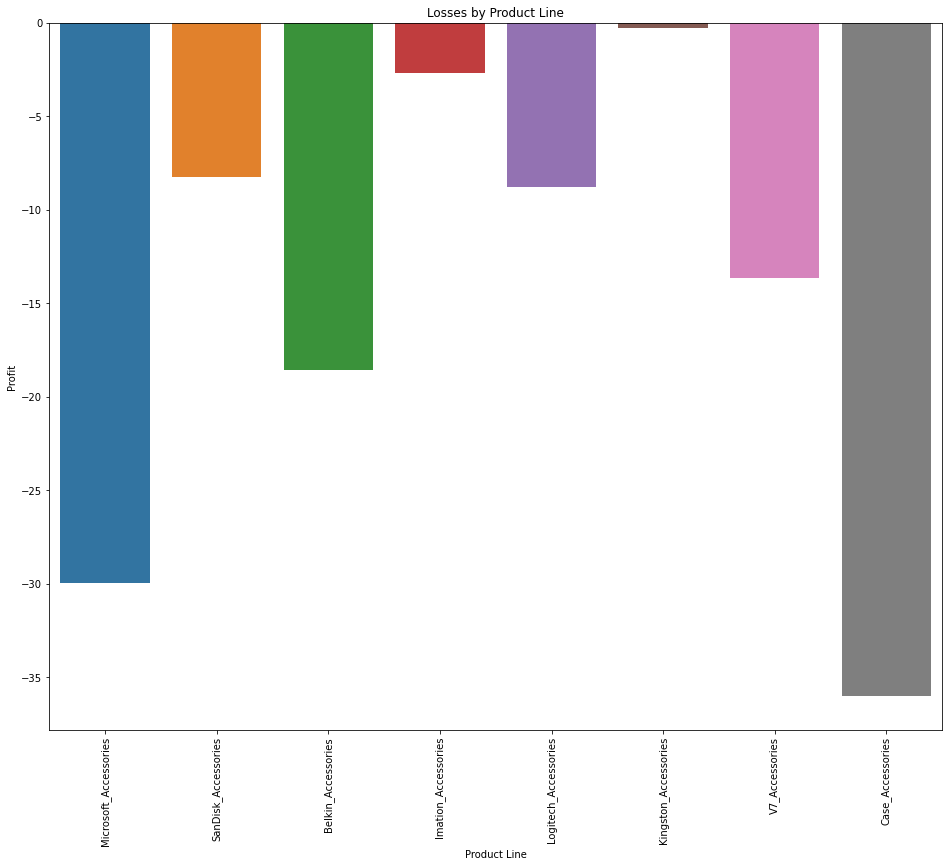

In [65]:
plt.figure(figsize=(16,13))
sns.barplot(x= 'product_line', y= 'profit', data = df_loss[(df_loss.sub_category == 'Accessories')], ci=None)
plt.xlabel('Product Line')
plt.ylabel('Profit')
plt.title('Losses by Product Line')
plt.xticks(rotation=90)
plt.show()

In [66]:
df_acc.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2014-02-01,CA-2014-140795,2014-02-01,2014-02-03,First Class,BD-11500,Consumer,Green Bay,Wisconsin,54302,468.90,...,0.0,206.32,Technology,Accessories,Enermax Aurora Lite Keyboard,Central,78.15,34.3860,Enermax,Enermax_Accessories
2014-02-07,CA-2014-107755,2014-02-07,2014-02-12,Standard Class,CK-12760,Corporate,Linden,New Jersey,7036,115.36,...,0.0,49.60,Technology,Accessories,Maxell DVD-RAM Discs,East,16.48,7.0864,Maxell,Maxell_Accessories
2014-04-06,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Home Office,Philadelphia,Pennsylvania,19143,116.78,...,0.2,21.90,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,East,72.99,10.9485,Imation,Imation_Accessories


In [67]:
df_acc.sort_values(by='profit', ascending=False)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2017-09-02,CA-2017-137596,2017-09-02,2017-09-07,Standard Class,BE-11335,Home Office,Jackson,Michigan,49201,1928.78,...,0.0,829.38,Technology,Accessories,Maxell iVDR EX 500GB Cartridge,Central,275.54,118.4822,Maxell,Maxell_Accessories
2015-07-31,CA-2015-124891,2015-07-31,2015-07-31,Same Day,RH-19495,Consumer,New York City,New York,10024,2309.65,...,0.0,762.18,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,East,329.95,108.8835,Plantronics,Plantronics_Accessories
2016-09-11,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Consumer,San Diego,California,92037,3347.37,...,0.0,636.00,Technology,Accessories,Logitech P710e Mobile Speakerphone,West,257.49,48.9231,Logitech,Logitech_Accessories
2017-05-14,CA-2017-143686,2017-05-14,2017-05-14,Same Day,PJ-19015,Consumer,Santa Ana,California,92704,1399.93,...,0.0,601.97,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,West,199.99,85.9957,Razer,Razer_Accessories
2015-12-19,CA-2015-157084,2015-12-19,2015-12-24,Standard Class,JG-15160,Consumer,Los Angeles,California,90049,1265.85,...,0.0,556.97,Technology,Accessories,Logitech G19 Programmable Gaming Keyboard,West,421.95,185.6580,Logitech,Logitech_Accessories
2015-12-15,CA-2015-109638,2015-12-15,2015-12-22,Standard Class,JH-15985,Consumer,Seattle,Washington,98115,899.91,...,0.0,377.96,Technology,Accessories,Logitech G700s Rechargeable Gaming Mouse,West,99.99,41.9958,Logitech,Logitech_Accessories
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2014-02-01,CA-2014-140795,2014-02-01,2014-02-03,First Class,BD-11500,Consumer,Green Bay,Wisconsin,54302,468.90,...,0.0,206.32,Technology,Accessories,Enermax Aurora Lite Keyboard,Central,78.15,34.3860,Enermax,Enermax_Accessories
2014-07-23,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Consumer,Tucson,Arizona,85705,1023.94,...,0.2,179.19,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,West,159.99,22.3986,NETGEAR,NETGEAR_Accessories


In [68]:
df_acc.head(135)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Consumer,Laredo,Texas,78041,31.20,...,0.2,9.75,Technology,Accessories,Memorex Micro Travel Drive 8 GB,Central,13.00,3.2500,Memorex,Memorex_Accessories
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2014-02-01,CA-2014-140795,2014-02-01,2014-02-03,First Class,BD-11500,Consumer,Green Bay,Wisconsin,54302,468.90,...,0.0,206.32,Technology,Accessories,Enermax Aurora Lite Keyboard,Central,78.15,34.3860,Enermax,Enermax_Accessories
2014-02-07,CA-2014-107755,2014-02-07,2014-02-12,Standard Class,CK-12760,Corporate,Linden,New Jersey,7036,115.36,...,0.0,49.60,Technology,Accessories,Maxell DVD-RAM Discs,East,16.48,7.0864,Maxell,Maxell_Accessories
2014-04-06,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Home Office,Philadelphia,Pennsylvania,19143,116.78,...,0.2,21.90,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,East,72.99,10.9485,Imation,Imation_Accessories
2014-05-09,US-2014-102071,2014-05-09,2014-05-15,Standard Class,PG-18820,Consumer,San Francisco,California,94110,67.80,...,0.0,4.07,Technology,Accessories,Kingston Digital DataTraveler 32GB USB 2.0,West,16.95,1.0170,Kingston,Kingston_Accessories
2014-05-09,US-2014-102071,2014-05-09,2014-05-15,Standard Class,PG-18820,Consumer,San Francisco,California,94110,167.97,...,0.0,40.31,Technology,Accessories,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,West,55.99,13.4376,Sony,Sony_Accessories
2014-05-11,CA-2014-103849,2014-05-11,2014-05-16,Standard Class,PG-18895,Consumer,Fort Worth,Texas,76106,58.11,...,0.2,7.26,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,Central,36.32,3.6320,SanDisk,SanDisk_Accessories
2014-05-27,CA-2014-139192,2014-05-27,2014-06-01,Second Class,LC-16885,Consumer,San Francisco,California,94109,99.99,...,0.0,38.00,Technology,Accessories,Logitech Wireless Performance Mouse MX for PC ...,West,99.99,37.9962,Logitech,Logitech_Accessories


In [69]:
df_acc_key = df_acc[(df_acc.product_name.str.contains('Keyboard')) | (df_acc.product_name.str.contains('keyboard'))]

In [70]:
df_acc_key.profit.sum()

1317.37

In [71]:
df_acc.profit.sum()

7786.370000000001

In [72]:
df_acc_mouse = df_acc[(df_acc.product_name.str.contains('Mouse')) | (df_acc.product_name.str.contains('mouse'))]

In [73]:
df_acc_mouse.profit.sum()

1205.94

In [74]:
df_acc_h = df_acc[(df_acc.product_name.str.contains('Headset')) | (df_acc.product_name.str.contains('headset'))]

In [75]:
df_acc_h.profit.sum()

2017.4600000000003

In [76]:
parts = ['Flash', 'flash', 'Disk', 'disk', 'Drive', 'drive', 'Memory', 'memory']

In [77]:
df_acc_parts = df_acc[(df_acc.product_name.str.contains('flash|Flash|Disk|disk|Drive|drive|memory|Memory'))]

In [78]:
df_acc_parts.profit.sum()

693.3899999999999

In [79]:
df_acc_h.quantity.sum()

42.0

In [80]:
df_acc_mouse.quantity.sum()

74.0

In [81]:
df_acc_key.quantity.sum()

104.0

In [82]:
df_acc_parts.quantity.sum()

136.0

In [83]:
1317.37 + 1205.94 + 2017.46 + 693.39

5234.160000000001

In [84]:
5234.16 / 7786.37

0.6722208166321405

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1734 non-null   object        
 1   order_date    1734 non-null   datetime64[ns]
 2   ship_date     1734 non-null   datetime64[ns]
 3   ship_mode     1734 non-null   object        
 4   customer_id   1734 non-null   object        
 5   segment       1734 non-null   object        
 6   city          1734 non-null   object        
 7   state         1734 non-null   object        
 8   postal_code   1734 non-null   object        
 9   sales         1734 non-null   float64       
 10  quantity      1734 non-null   float64       
 11  discount      1734 non-null   float64       
 12  profit        1734 non-null   float64       
 13  category      1734 non-null   object        
 14  sub_category  1734 non-null   object        
 15  product_name  1734 n

In [86]:
df_acc_key.brand.value_counts()

Logitech     13
Enermax       3
Belkin        3
Microsoft     2
Micro         2
KeyTronic     1
HP            1
Anker         1
Case          1
Name: brand, dtype: int64

In [87]:
df_acc_h.brand.value_counts()

Plantronics    5
Logitech       4
Razer          3
Name: brand, dtype: int64

In [88]:
df_acc_h.head(20)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-13,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Corporate,Bossier City,Louisiana,71111,646.74,...,0.0,258.70,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,South,107.79,43.1160,Plantronics,Plantronics_Accessories
2015-05-16,CA-2015-100769,2015-05-16,2015-05-16,Same Day,TH-21550,Home Office,Jacksonville,Florida,32216,255.97,...,0.2,32.00,Technology,Accessories,Razer Kraken PRO Over Ear PC and Music Headset,South,79.99,7.9990,Razer,Razer_Accessories
2015-07-31,CA-2015-124891,2015-07-31,2015-07-31,Same Day,RH-19495,Consumer,New York City,New York,10024,2309.65,...,0.0,762.18,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,East,329.95,108.8835,Plantronics,Plantronics_Accessories
2015-10-15,CA-2015-139731,2015-10-15,2015-10-15,Same Day,JE-15745,Consumer,Amarillo,Texas,79109,263.88,...,0.2,42.88,Technology,Accessories,Plantronics Audio 995 Wireless Stereo Headset,Central,109.95,14.2935,Plantronics,Plantronics_Accessories
2016-03-22,CA-2016-107615,2016-03-22,2016-03-25,First Class,RB-19645,Corporate,North Las Vegas,Nevada,89031,58.58,...,0.0,19.33,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,West,29.29,9.6657,Logitech,Logitech_Accessories
2016-04-23,CA-2016-162138,2016-04-23,2016-04-27,Standard Class,GK-14620,Corporate,Hesperia,California,92345,99.99,...,0.0,35.00,Technology,Accessories,Logitech Wireless Headset h800,West,99.99,34.9965,Logitech,Logitech_Accessories
2016-04-24,CA-2016-168081,2016-04-24,2016-04-27,Second Class,CA-12055,Home Office,Houston,Texas,77070,258.70,...,0.2,64.67,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,Central,107.79,21.5580,Plantronics,Plantronics_Accessories
2016-06-14,CA-2016-107216,2016-06-14,2016-06-17,First Class,PV-18985,Home Office,San Francisco,California,94122,29.29,...,0.0,9.67,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,West,29.29,9.6657,Logitech,Logitech_Accessories
2016-11-20,CA-2016-110772,2016-11-20,2016-11-24,Second Class,NZ-18565,Home Office,Columbus,Ohio,43229,255.98,...,0.2,54.40,Technology,Accessories,Logitech Wireless Gaming Headset G930,East,159.99,27.1983,Logitech,Logitech_Accessories


In [89]:
df_acc.brand.value_counts()

Logitech       39
Imation        12
Memorex         9
SanDisk         9
Sony            8
Verbatim        6
Microsoft       6
Maxell          5
Plantronics     5
NETGEAR         4
Belkin          3
Enermax         3
Razer           3
Kingston        2
Hypercom        2
Kensington      2
Micro           2
Sabrent         2
Anker           1
WD              1
First           1
Micropad        1
HP              1
V7              1
Lenovo          1
KeyTronic       1
Case            1
Name: brand, dtype: int64

In [90]:
df_acc.groupby('brand').profit.sum()

brand
Anker            14.99
Belkin           22.41
Case            -35.99
Enermax         277.56
First            31.60
HP                7.25
Hypercom         85.68
Imation         351.96
Kensington      115.78
KeyTronic        56.57
Kingston          3.80
Lenovo            1.36
Logitech       2865.23
Maxell          955.24
Memorex         154.44
Micro            31.50
Micropad          2.00
Microsoft       159.24
NETGEAR         526.38
Plantronics    1193.10
Razer           705.96
Sabrent           9.24
SanDisk          38.75
Sony            118.15
V7              -13.65
Verbatim         77.73
WD               30.09
Name: profit, dtype: float64

In [91]:
df.groupby('sub_category').quantity.sum()

sub_category
Accessories     476.0
Appliances      275.0
Art             553.0
Binders        1007.0
Bookcases       126.0
Chairs          368.0
Copiers          31.0
Envelopes       174.0
Fasteners       201.0
Furnishings     616.0
Labels          258.0
Machines         88.0
Paper           823.0
Phones          610.0
Storage         584.0
Supplies         99.0
Tables          291.0
Name: quantity, dtype: float64

In [92]:
df_acc.ship_mode.value_counts()

Standard Class    64
First Class       31
Second Class      28
Same Day           8
Name: ship_mode, dtype: int64

In [93]:
df_acc.groupby('ship_mode').profit.sum()

ship_mode
First Class       1166.21
Same Day          1509.36
Second Class       871.02
Standard Class    4239.78
Name: profit, dtype: float64

In [94]:
df_acc.groupby('region_name').profit.sum()

region_name
Central    1822.41
East       1786.08
South       880.55
West       3297.33
Name: profit, dtype: float64

In [95]:
df_acc.region_name.value_counts()

West       43
East       37
Central    33
South      18
Name: region_name, dtype: int64

In [ ]:
def 